In [37]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import os
import seaborn as sns
from datetime import datetime
from textwrap import wrap
from matplotlib import ticker


%matplotlib inline

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

We are going to do time series analysis and forecasting for furniture sales.

In [38]:
#print(os.listdir('../data'))
df = pd.read_csv('../data/NumberConfirmedOfCases.csv')
df['Date'] = df.apply(lambda x: datetime.strptime(x['Date'], '%d-%m-%Y').date(), axis=1) #convert the date
df = df.groupby('Date')['Cases'].sum().reset_index() #group the data
df.head()

,Date,Cases
0,2020-03-12,1
1,2020-03-20,1
2,2020-03-24,1
3,2020-03-25,2
4,2020-03-29,1


In [39]:
import datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].map(datetime.datetime.toordinal)
#sns.lmplot(x ="Date", y ="Cases", data = df, order = 2, ci = None) 

# Plotting the data scatter 
#print(df['Date'])

Estimated coefficients:
b_0 = -85212.73668431118 \ 
b_1 = 0.11554302940153598


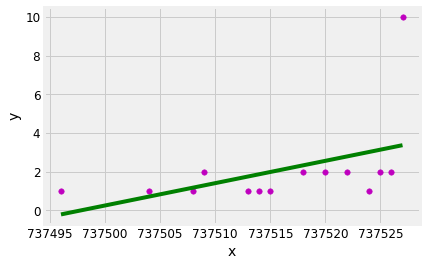

In [40]:
def estimate_coef(x, y): 
 # number of observations/points 
    n = np.size(x) 

    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 

    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 

    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 

    return(b_0, b_1) 

def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
            marker = "o", s = 30) 

    # predicted response vector 
    y_pred = b[0] + b[1]*x 

    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 

    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 

    # function to show plot 
    plt.show() 

def main(): 
    # observations 
    x = df['Date']
    y = df['Cases']

    # estimating coefficients 
    b = estimate_coef(x, y) 
    print("Estimated coefficients:\nb_0 = {} \ \nb_1 = {}".format(b[0], b[1])) 

    # plotting regression line 
    plot_regression_line(x, y, b) 

if __name__ == "__main__": 
    main() 


In [42]:
import pandas as pd

from pandas import DataFrame, Series

import statsmodels.formula.api as sm
#print(os.listdir('../data'))
df = pd.read_csv('../data/NumberConfirmedOfCases.csv')
df = df.groupby('Date')['Cases'].sum().reset_index() #group the data
#print(df.head())
df['Date'] = pd.to_datetime(df['Date'])    
df['date'] = (df['Date'] - df['Date'].min())  / np.timedelta64(1,'D') 

#different formulas to convert the dates gives different coef, look at the date values.

#df['date'] = df['Date'].map(datetime.datetime.toordinal)
#print(df['date'])
result = sm.ols(formula = 'Cases ~ date', data = df).fit()
print(result.params)
print('------------------')
print('------------------')
print(result.pvalues)
print('------------------')
print('------------------')
print(result.rsquared)
print(result.summary())

Intercept    0.972849
date         0.010186
dtype: float64
------------------
------------------
Intercept    0.264318
date         0.092094
dtype: float64
------------------
------------------
0.2182959732600982
                            OLS Regression Results                            
Dep. Variable:                  Cases   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     3.351
Date:                Mon, 13 Apr 2020   Prob (F-statistic):             0.0921
Time:                        21:53:18   Log-Likelihood:                -29.499
No. Observations:                  14   AIC:                             63.00
Df Residuals:                      12   BIC:                             64.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                       